# **MINI PROJECT DATA VISUALIZATION WITH PYTHON**



**PENGENALAN DATASET**

Dataset yang digunakan dalam mini project ini adalah retai-raw-reduced.csv yang merupakan data transaksi supermarket sepanjang tahun 2019 dengan penjelasan setiap kolom sebagai berikut:


*   order_id : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
*   order_date : tanggal terjadinya transaksi
*   customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
*   city : kota tempat toko terjadinya transaksi
*   province : provinsi (berdasarkan city)
*   product_id : ID dari suatu product yang dibeli
*   brand : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
*   quantity : Kuantitas / banyaknya product yang dibeli
*  item_price : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [40]:
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [41]:
# review dataset
dataset.head(10)

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000
7,1695367,2019-09-26,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2,205000
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000
9,1720189,2019-11-24,14723,Tangerang,Banten,P1701,BRAND_H,2,149000


In [42]:
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [43]:
# Buat kolom gmv
dataset['gmv'] = dataset['quantity'] * dataset['item_price']

In [44]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))

In [45]:
# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

In [46]:
# review dataset setelah ditambahkan kolom baru
dataset.head(10)

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000,2019-07,2080000,DKI Jakarta
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000,DKI Jakarta
7,1695367,2019-09-26,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2,205000,2019-09,410000,Jawa Tengah
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12,14400000,DKI Jakarta
9,1720189,2019-11-24,14723,Tangerang,Banten,P1701,BRAND_H,2,149000,2019-11,298000,other


***Mini Project - Case 1: Menentukan Brand Top 5***

Membuat variabel baru yang berisi data penjualan bulan Desember 2019 hanya untuk top 5 brands dengan quantity terbanyak selama bulan Desember 2019

In [7]:
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print('Top 5 Brand\n\n', top_brands)

Top 5 Brand

      brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


***Mini Project - Case 2: Multi-line Chart Daily Quantity untuk Brand Top 5***

Membuat visualisasi multi-line chart untuk daily quantity terjualnya, lalu berikan anotasi pada titik yang mengalami lonjakan tinggi.

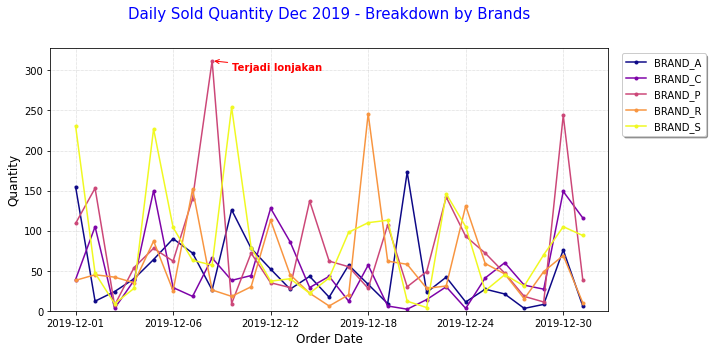

In [9]:
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue') # membuat judul grafik
plt.xlabel('Order Date', fontsize = 12) # membuat label di sumbu-x
plt.ylabel('Quantity',fontsize = 12) # membuat label di sumbu-y
plt.grid(color='darkgray', linestyle=':', linewidth=0.5) # membuat grid
plt.ylim(ymin=0) # setting titik minimum sumbu-y
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1) # membuat legenda
# membuat anotasi
plt.annotate('Terjadi lonjakan', xy=(7, 312), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

*Gambar pada grafik Daily Sold Quantity Dec 2019 - Breakdown by Brands menunjukkan pola penjualan harian untuk brand top 5 selama bulan Desember 2019. Berdasarkan gambar tersebut, terlihat terjadi lonjakan penjualan yang cukup tinggi untuk BRAND_P di tanggal 8 Desember 2019. Brand lain seperti BRAND_S dan BRAND_R beberapa kali juga mengalami lonjakan penjualan meskipun tinga setinggi BRAND_P. Seluruh brand top 5 mengalami penurunan penjualan dari hari sebelumnya namun hal ini tidak perlu dikhawatirkan karena penurunannya tidak signifikan dan cenderung normal.*

***Mini Project - Case 3: Kuantitas Penjualan Brand Top 5 Selama Desember 2019***

Mencari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019, lalu gunakan bar chart untuk visualisasinya.

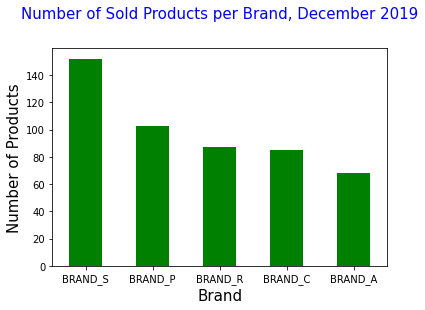

In [10]:
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green') 
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue') # membuat judul grafik
plt.xlabel('Brand', fontsize = 15) # membuat label di sumbu-x
plt.ylabel('Number of Products',fontsize = 15) # membuat label di sumbu-y
plt.ylim(ymin=0) # setting titik minimum sumbu-y
plt.xticks(rotation=0)
plt.show()

*Grafik Number of Sold Products per Brand, December 2019 menunjukkan jumlah product brand top 5 yang laku terjual selama bulan Desember 2019. BRAND_S menjadi brand dengan produk terbanyak yang laku dan BRAND_A menjadi brand dengan produk yang paling sedikit laku selama bulan Desember 2019.*

***Mini Project - Case 4: Penjulan Produk Di atas 100 dan Di bawah 100 Selama Desember 2019***

Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di bulan Desember 2019.

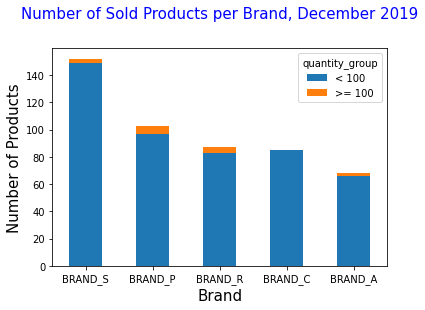

In [11]:
#membuat dataframe baru untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

*Gambar Number of Sold Products per Brand, December 2019 menunjukkan quantity product yang terjual dari setiap brand. Terlihat bahwa sebagian produk terjual sebanyak kurang dari 100 selama bulan Desember 2019.*

***Mini Project - Case 5: Murah atau Mahalkah Harga Produk Brand Top 5***

Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?

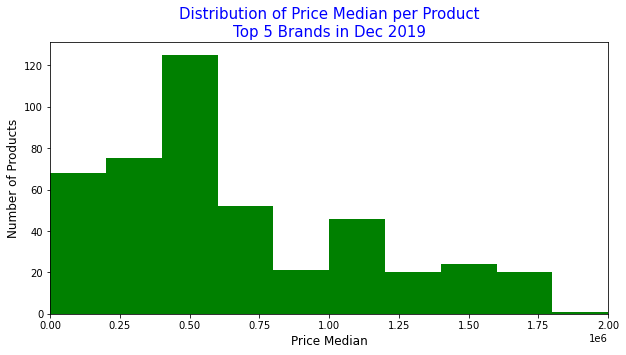

In [12]:
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

*Distribution of Price Median per Product Top 5 Brands in Dec 2019 menunjukkan distribusi harga produk di brand top 5 selama bulan Desember 2019. Dari histogram terlihat sebagian besar produk memiliki harga di bawah 1.000.000*

***Mini Project - Case 6a: Korelasi Quantity vs GMV***

Gunakan scatter plot untuk melihat korelasi antara quantity dengan GMV

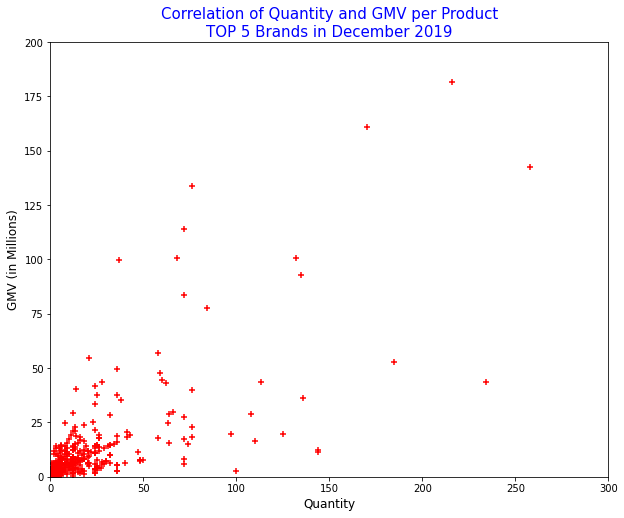

In [13]:
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTOP 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

*Dari grafik Correlation of Quantity and GMV per Product TOP 5 Brands in December 2019 terlihat bahwa variabel quantity dan variabel GMV berkorelasi.*

***Mini Project - Case 6b: Korelasi Median Harga vs Quantity***

Gunakan scatter plot untuk melihat korelasi antara median harga dengan quantity.

<Figure size 432x288 with 0 Axes>

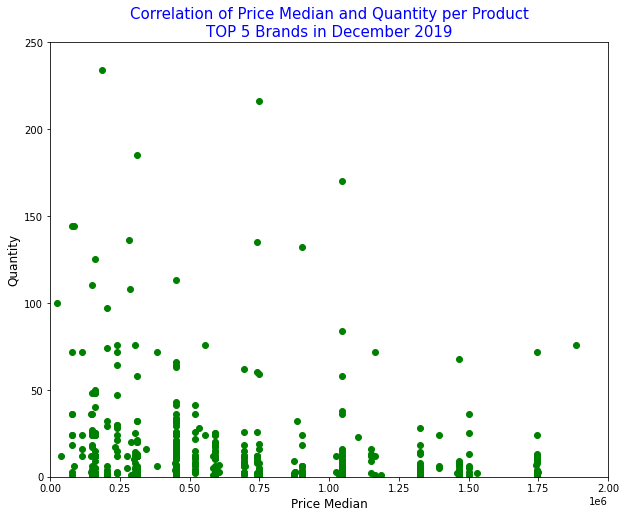

In [26]:
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Price Median and Quantity per Product\nTOP 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()

*Dari grafik Correlation of Price Median and Quantity per Product TOP 5 Brands in December 2019 terlihat bahwa variabel price median dan quantity tidak memiliki korelasi.*